In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [10]:
data = pd.read_csv("D:\Skillslash\Stats and ML\Projects\Car Evaluation\car_evaluation.csv")
data.head()
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


(1727, 7)

In [11]:
column_names = ['buy','main','doors','persons','boot_area','safety_rating','class']
data.columns = column_names

In [12]:
data.head()

,buy,main,doors,persons,boot_area,safety_rating,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [13]:
for column in column_names:
    print(data[column].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buy, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: main, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: boot_area, dtype: int64
med     576
high    576
low     575
Name: safety_rating, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [16]:
data.isnull().sum()

buy              0
main             0
doors            0
persons          0
boot_area        0
safety_rating    0
class            0
dtype: int64

In [18]:
data.dtypes

buy              object
main             object
doors            object
persons          object
boot_area        object
safety_rating    object
class            object
dtype: object

In [17]:
x = data.drop(['class'],axis = 1)
y = data['class']

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [65]:
ohe = OneHotEncoder()
ohe.fit(x_train)
ohe.fit(x_test)
x_train_ohe = ohe.transform(x_train).toarray()
x_test_ohe = ohe.transform(x_test).toarray()

ohe_df = pd.DataFrame(x_train_ohe, columns = ohe.get_feature_names(x_train.columns))

ohe_df.head()

,buy_high,buy_low,buy_med,buy_vhigh,main_high,main_low,main_med,main_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,boot_area_big,boot_area_med,boot_area_small,safety_rating_high,safety_rating_low,safety_rating_med
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
#lb = LabelBinarizer()
#cat_var = (['buy','main','doors','persons','boot_area','safety_rating'])
#x_train = lb.fit_transform(cat_var)

In [108]:
from sklearn.tree import DecisionTreeClassifier

classification = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 0)

classification.fit(x_train_ohe,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

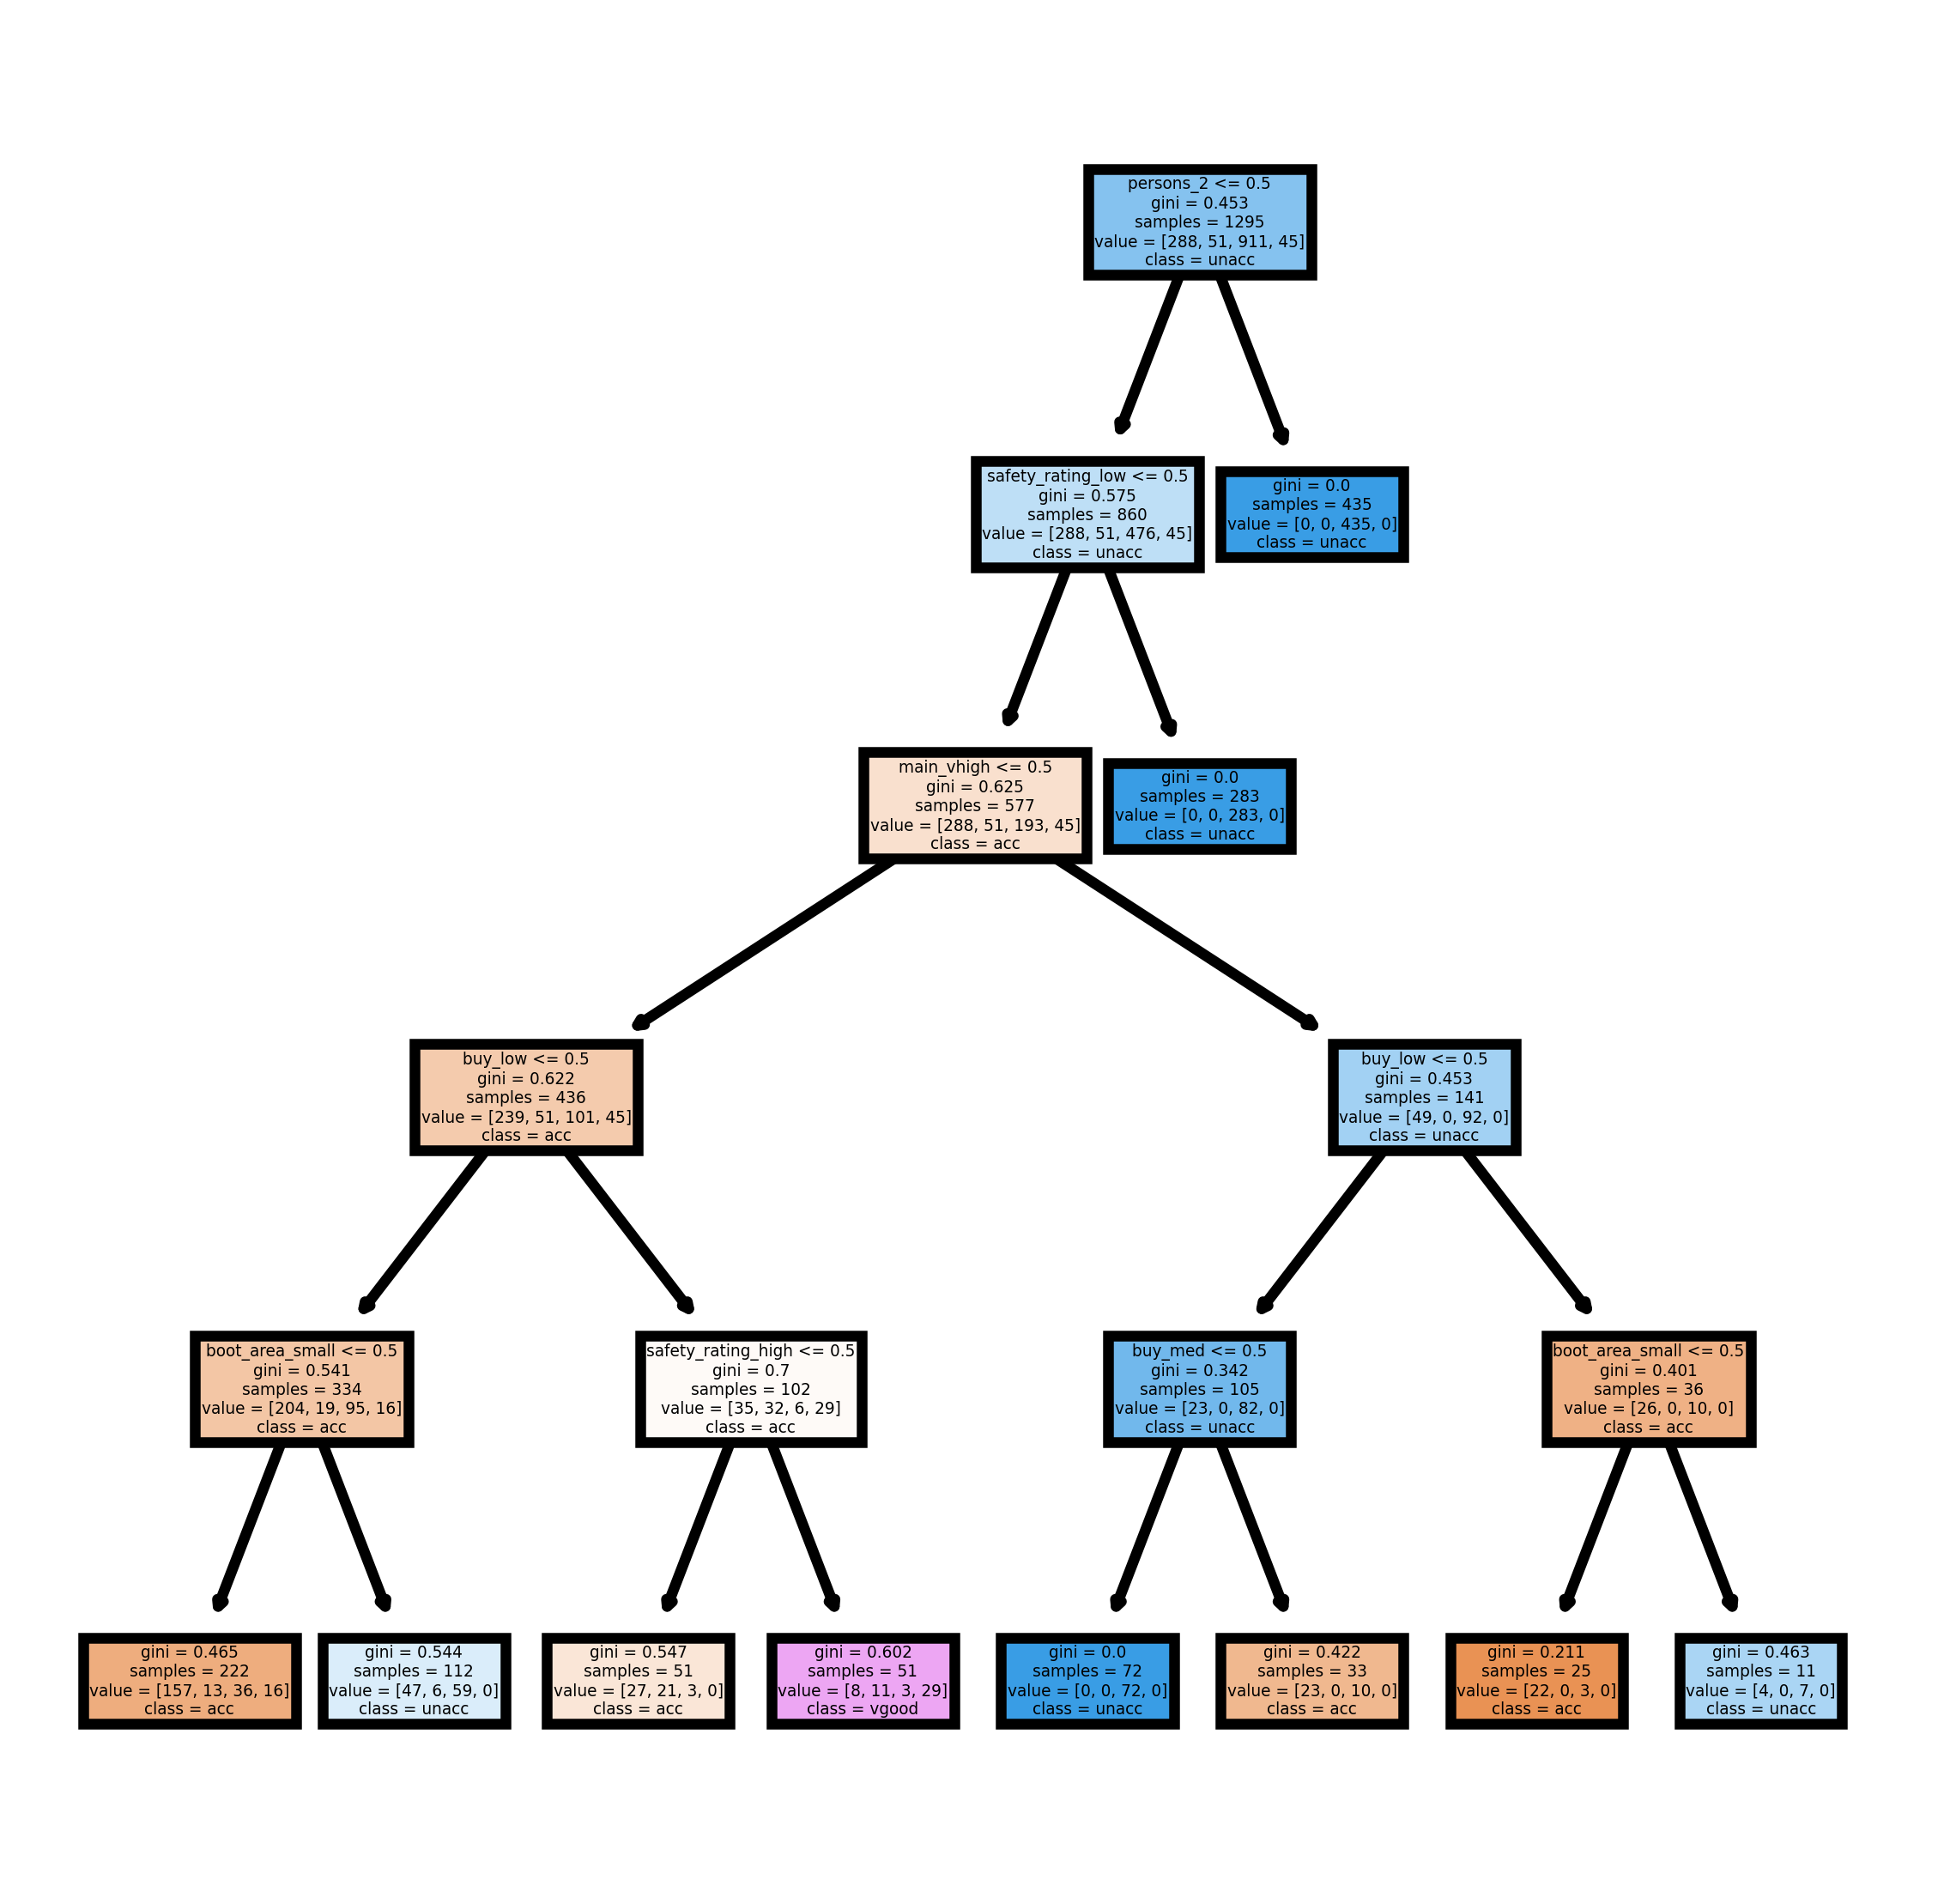

In [109]:
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,3),dpi = 900)
tree.plot_tree(classification, feature_names = ohe_df.columns, class_names = np.unique(y).astype('str'), filled = True)
plt.show()

In [71]:
y_pred_gini = classification.predict(x_test_ohe)

In [72]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_gini))

0.8495370370370371


In [78]:
y_pred_train_gini = classification.predict(x_train_ohe)

In [89]:
Training_Accuracy = ((accuracy_score(y_train, y_pred_train_gini)))
print(Training_Accuracy)

0.8602316602316602


In [95]:
print("Training set score: ", classification.score(x_train_ohe, y_train))
print("Testing score: ", classification.score(x_test_ohe, y_test))


Training set score:  0.8602316602316602
Testing score:  0.8495370370370371


### With Entropy 

In [110]:
classification_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 0)
classification_entropy.fit(x_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

[Text(489.32307692307694, 398.64, 'X[12] <= 0.5\nentropy = 1.191\nsamples = 1295\nvalue = [288, 51, 911, 45]'),
 Text(437.81538461538463, 326.15999999999997, 'X[19] <= 0.5\nentropy = 1.465\nsamples = 860\nvalue = [288, 51, 476, 45]'),
 Text(386.3076923076923, 253.67999999999998, 'X[7] <= 0.5\nentropy = 1.625\nsamples = 577\nvalue = [288, 51, 193, 45]'),
 Text(206.03076923076924, 181.2, 'X[1] <= 0.5\nentropy = 1.664\nsamples = 436\nvalue = [239, 51, 101, 45]'),
 Text(103.01538461538462, 108.71999999999997, 'X[2] <= 0.5\nentropy = 1.396\nsamples = 334\nvalue = [204, 19, 95, 16]'),
 Text(51.50769230769231, 36.23999999999995, 'entropy = 0.943\nsamples = 222\nvalue = [142, 0, 80, 0]'),
 Text(154.52307692307693, 36.23999999999995, 'entropy = 1.696\nsamples = 112\nvalue = [62, 19, 15, 16]'),
 Text(309.04615384615386, 108.71999999999997, 'X[18] <= 0.5\nentropy = 1.811\nsamples = 102\nvalue = [35, 32, 6, 29]'),
 Text(257.53846153846155, 36.23999999999995, 'entropy = 1.253\nsamples = 51\nvalue =

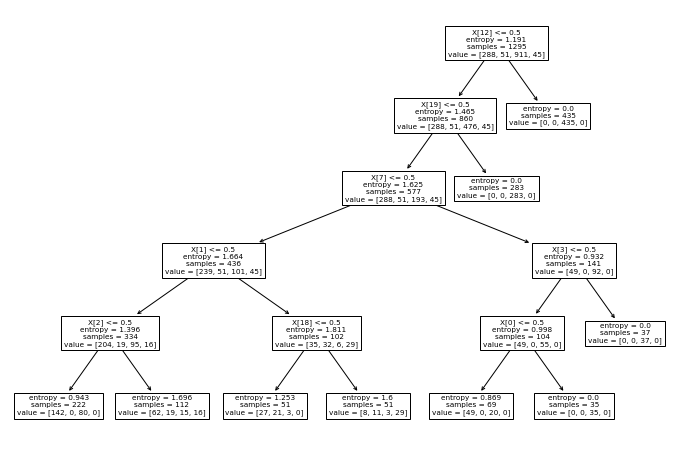

In [117]:
plt.figure(figsize = (12,8))
tree.plot_tree(classification_entropy.fit(x_train_ohe, y_train))

In [112]:
y_pred_entropy = classification_entropy.predict(x_test_ohe)

In [113]:
Accuracy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy: ", Accuracy)

Accuracy:  0.8541666666666666


In [115]:
print("Training set score: ", classification_entropy.score(x_train_ohe, y_train))
print("Testing score: ", classification_entropy.score(x_test_ohe, y_test))

Training set score:  0.8486486486486486
Testing score:  0.8541666666666666
